In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#downlaoding dataset
!kaggle competitions download -c cifar-10

 98% 704M/715M [00:06<00:00, 126MB/s]
100% 715M/715M [00:06<00:00, 109MB/s]


In [4]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [5]:
#extracting files
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [7]:
#to extract .7z files which contain training data
!pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 47.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.7/413.7 kB 30.0 MB/s eta 0:00:00


In [8]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [10]:
#Neural Netwrok

import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [11]:
filenames = os.listdir('/content/train')

In [12]:
len(filenames)

50000

In [13]:
print(filenames[0:5])

['16987.png', '27972.png', '31329.png', '24263.png', '22916.png']


In [14]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [15]:
labels_df.shape

(50000, 2)

In [16]:
labels_df.head(
)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [17]:
labels_df[labels_df['id'] ==42491]

,id,label
42490,42491,automobile


In [18]:
len(labels_df[labels_df['label']== 'deer'])

5000

In [19]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [20]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [21]:
labels_dictionary

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [22]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


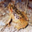

In [23]:
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread('/content/train/7796.png')
cv2_imshow(img)

In [24]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [25]:
id_list = list(labels_df['id'])

In [26]:
id_list[-5:]

[49996, 49997, 49998, 49999, 50000]

Image Processing


In [27]:
#Images to numpy array
train_data_folder = '/content/train/'
data = []

for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image_array = np.array(image)
  data.append(image_array)


In [28]:
image_array.shape
# output -> (32,32,3) [32,32] is width and height and 3 is RGB

(32, 32, 3)

In [29]:
type(data[0])

numpy.ndarray

In [30]:
 #Convert images list and labels lsit into numpy array
 X = np.array(data)
 y = np.array(labels)

In [31]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=2)

In [32]:
X_train.shape

(40000, 32, 32, 3)

In [33]:
# scaling the values of images(0,255) to (0,1)

X_train_scale = X_train/255
X_test_scale = X_test/255


In [34]:
X_train_scale

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

Buidling Neurla network

In [35]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout


In [36]:
num_of_classes = 10
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(num_of_classes, activation = 'softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [38]:
#Training the network
model = model.fit(X_train_scale,y_train, validation_split=0.1, epochs = 10)


Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2466 - loss: 2.0573 - val_accuracy: 0.3252 - val_loss: 1.8606
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3364 - loss: 1.8383 - val_accuracy: 0.3577 - val_loss: 1.7675
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3565 - loss: 1.7854 - val_accuracy: 0.3595 - val_loss: 1.7657
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3586 - loss: 1.7775 - val_accuracy: 0.3593 - val_loss: 1.7589
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3639 - loss: 1.7576 - val_accuracy: 0.3632 - val_loss: 1.7376
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3675 - loss: 1.7475 - val_accuracy: 0.3587 - val_loss: 1.7471
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3738 - loss: 1.7359 - val_accuracy: 0.3738 - val_loss: 1.7173
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3794 - loss: 1.7195 - 

In [39]:
#using Transfer Learning
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import optimizers


In [40]:
'''weights = getting weights gathered from imagenet data trained on resnet
include_top = False -> drop final layer and add our final layers
shape is 256,256,3 is because resnet is trained in that shape '''

convonutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256,3))
convonutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 262, 262, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 128, 128, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 128, 128, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 128, 128, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 130, 130, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 64, 64, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 64, 64, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 64, 64, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 64, 64, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 64, 64, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 64, 64, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 64, 64, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [41]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2))) # scales image from 32,32 to 64,64
model.add(layers.UpSampling2D((2,2))) # scales image from 64,64 to 128,128
model.add(layers.UpSampling2D((2,2))) # scales image from 128,128 to 256,256
model.add(convonutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization()) # basically normalizes the whole batch values
model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dropout(0.5)) # to prevent overfitting
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation='softmax'))

In [42]:
model.compile(optimizer = optimizers.RMSprop(learning_rate = 2e-5),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [43]:
history = model.fit(X_train_scale,y_train, validation_split=0.1, epochs = 10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 457s 357ms/step - accuracy: 0.3278 - loss: 2.0276 - val_accuracy: 0.7803 - val_loss: 0.8205
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 410s 357ms/step - accuracy: 0.6740 - loss: 1.0658 - val_accuracy: 0.8890 - val_loss: 0.4384
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 433s 349ms/step - accuracy: 0.8012 - loss: 0.7553 - val_accuracy: 0.9175 - val_loss: 0.3379
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 349ms/step - accuracy: 0.8675 - loss: 0.5708 - val_accuracy: 0.9320 - val_loss: 0.2727
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 348ms/step - accuracy: 0.9053 - loss: 0.4515 - val_accuracy: 0.9390 - val_loss: 0.2344
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 451s 356ms/step - accuracy: 0.9334 - loss: 0.3540 - val_accuracy: 0.9435 - val_loss: 0.2177
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 356ms/step - accuracy: 0.9505 - loss: 0.2812 - val_accuracy: 0.9377 - val_loss: 0.2274
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 392s 348ms/step - ac

In [45]:
loss, accuracy = model.evaluate(X_test_scale, y_test)
print("Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 111ms/step - accuracy: 0.9348 - loss: 0.2414
Accuracy: 0.9369999766349792


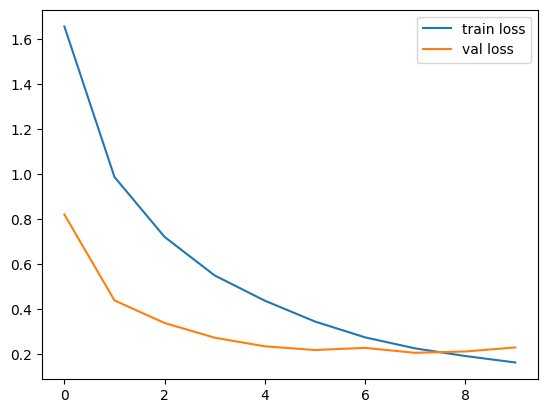

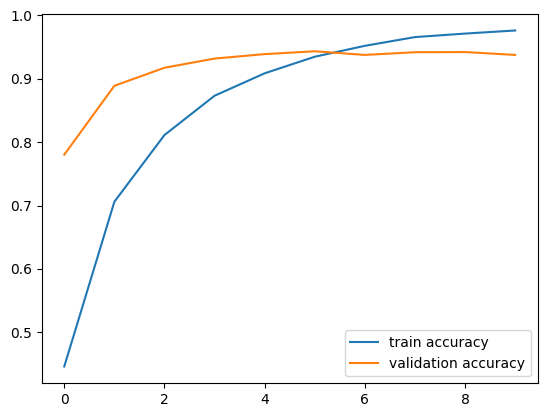

In [53]:
h = history

#plotting loss function value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='val loss')
plt.legend()
plt.show()

#plotting accuracy
plt.plot(h.history['accuracy'], label = 'train accuracy')
plt.plot(h.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

In [47]:
# predicting
predictions = model.predict(X_test_scale)

313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 107ms/step


In [51]:
index_to_label

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [52]:
true_labels = [index_to_label[i] for i in y_test]
index_to_label = {v:k for k, v in labels_dictionary.items()}
predicted_classes = np.argmax(predictions, axis = 1)
predicted_labels = [index_to_label[i] for i in predicted_classes]

for i in range(10):  # Adjust range as needed
    print(f"Image {i+1}: Original Label = {true_labels[i]}, Predicted Label = {predicted_labels[i]}")

Image 1: Original Label = bird, Predicted Label = bird
Image 2: Original Label = automobile, Predicted Label = automobile
Image 3: Original Label = deer, Predicted Label = deer
Image 4: Original Label = bird, Predicted Label = bird
Image 5: Original Label = dog, Predicted Label = cat
Image 6: Original Label = frog, Predicted Label = frog
Image 7: Original Label = deer, Predicted Label = deer
Image 8: Original Label = cat, Predicted Label = cat
Image 9: Original Label = ship, Predicted Label = ship
Image 10: Original Label = bird, Predicted Label = bird


In [49]:
# Save the entire model to a HDF5 file
model.save('Resnet_Cifar_model.h5')


In [50]:
from google.colab import files

# Download the model to your local machine
files.download('Resnet_Cifar_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>